# Sampling and the central limit theorem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

In [3]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

In [4]:
print('Sample 1 mean = {}'.format(sample1.mean()))
print('Sample 1 standard deviation = {}'.format(sample1.std()))
print('Sample 2 mean = {}'.format(sample2.mean()))
print('Sample 2 standard deviation = {}'.format(sample2.std()))

Sample 1 mean = 2.19
Sample 1 standard deviation = 1.3014991356124674
Sample 2 mean = 5.06
Sample 2 standard deviation = 1.5926079241294764


### Task 1

Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

#### Hypothesis

By either increasing or decreasing the sample size, I would predict that the means would not change drastically for each sample. But, I would predict that the larger sample size would have a smaller standard deviation, while the smaller sample size would have a larger standard deviation.

In [5]:
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

In [6]:
print('Sample 1 mean = {}'.format(sample1.mean()))
print('Sample 1 standard deviation = {}'.format(sample1.std()))
print('Sample 2 mean = {}'.format(sample2.mean()))
print('Sample 2 standard deviation = {}'.format(sample2.std()))

Sample 1 mean = 1.933
Sample 1 standard deviation = 1.2808243439285498
Sample 2 mean = 4.974
Sample 2 standard deviation = 1.6575053544408234


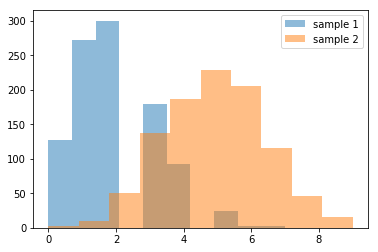

In [7]:
plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

In [8]:
sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

In [9]:
print('Sample 1 mean = {}'.format(sample1.mean()))
print('Sample 1 standard deviation = {}'.format(sample1.std()))
print('Sample 2 mean = {}'.format(sample2.mean()))
print('Sample 2 standard deviation = {}'.format(sample2.std()))

Sample 1 mean = 2.0
Sample 1 standard deviation = 1.0
Sample 2 mean = 4.55
Sample 2 standard deviation = 1.7168284713389397


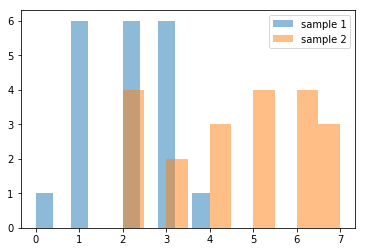

In [10]:
plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

### Task 2

Change the probability value (p in the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html)) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

#### Hypothesis

As the probability value increases closer to 0.5, the probability value for population 2, then the two populations will be closer together. Therefore, the t-statistic would decrease while the p-value would increase.

In [2]:
def compute_tstat(s1, s2):
    sample_sizes = np.array([len(s1), len(s2)])
    sample_sds = np.array([s1.std(), s2.std()])
    diff_se = (sum(sample_sds ** 2 / sample_sizes)) ** 0.5
    diff_mean = s2.mean() - s1.mean()
    return diff_mean / diff_se

**Population 1 probability = 0.2**

In [3]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

In [4]:
# sample1 = np.random.choice(pop1, 100, replace=True)
sample1 = np.random.choice(pop2, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

In [5]:
tstat = compute_tstat(sample1, sample2)
pvalue = ttest_ind(sample1, sample2, equal_var=False).pvalue

In [7]:
print(ttest_ind(sample1, sample2, equal_var=False))

Ttest_indResult(statistic=0.20697487289407715, pvalue=0.8362424409281226)


In [6]:
print('The t-statistic is {}.'.format(tstat))
print('The p-value is {}.'.format(pvalue))

The t-statistic is -0.2080175740670164.
The p-value is 0.8362424409281226.


**Population 1 probability = 0.3**

In [16]:
pop1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

In [17]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

In [18]:
tstat = compute_tstat(sample1, sample2)
pvalue = ttest_ind(sample1, sample2, equal_var=False).pvalue

In [19]:
print('The t-statistic is {}.'.format(tstat))
print('The p-value is {}.'.format(pvalue))

The t-statistic is 9.297926767859114.
The p-value is 3.838352966223798e-17.


**Population 1 probability = 0.4**

In [20]:
pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

In [21]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

In [22]:
tstat = compute_tstat(sample1, sample2)
pvalue = ttest_ind(sample1, sample2, equal_var=False).pvalue

In [23]:
print('The t-statistic is {}.'.format(tstat))
print('The p-value is {}.'.format(pvalue))

The t-statistic is 3.3815117170953815.
The p-value is 0.0009214566886888742.


### Task 3

Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [24]:
pop1 = np.random.uniform(0, 7, 10000)
pop2 = np.random.uniform(3, 15, 10000)

In [25]:
print('Population 1 mean = {}'.format(pop1.mean()))
print('Population 1 standard deviation = {}'.format(pop1.std()))
print('Population 2 mean = {}'.format(pop2.mean()))
print('Population 2 standard deviation = {}'.format(pop2.std()))

Population 1 mean = 3.4837015936857387
Population 1 standard deviation = 2.008416321761386
Population 2 mean = 8.952545864490578
Population 2 standard deviation = 3.45813813134525


In [26]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

In [27]:
print('Sample 1 mean = {}'.format(sample1.mean()))
print('Sample 1 standard deviation = {}'.format(sample1.std()))
print('Sample 2 mean = {}'.format(sample2.mean()))
print('Sample 2 standard deviation = {}'.format(sample2.std()))

Sample 1 mean = 3.773686122220036
Sample 1 standard deviation = 1.9799351960282594
Sample 2 mean = 8.84279336853601
Sample 2 standard deviation = 3.325211552650725


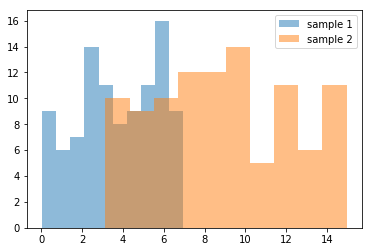

In [28]:
plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

In [29]:
tstat = compute_tstat(sample1, sample2)
pvalue = ttest_ind(sample1, sample2, equal_var=False).pvalue

In [30]:
print('The t-statistic is {}.'.format(tstat))
print('The p-value is {}.'.format(pvalue))

The t-statistic is 13.098347974431071.
The p-value is 5.5310462786271336e-27.


#### Observations

I chose to use a uniform distribution for each population. Each sample has similar means and standard deviations to their respective populations. Therefore, the samples do a good job of representing the population.